Q4. Campaign Impact Analysis 

○ What are the key performance indicators (KPIs) for assessing the success of
marketing campaigns?
○ Objective: Develop a framework for measuring campaign success using data
such as engagement rate, conversion rate, and customer lifetime value (CLV).
○ Expected Outcome: Propose actionable insights on how to improve marketing
Strategies.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing Data
df_campaigns = pd.read_csv("../Data DSA3101/campaigns.csv")
df_engagement = pd.read_csv("../Data DSA3101/customer_engagement.csv")
df_churn_prob = pd.read_excel("../Data DSA3101/churn_probability.xlsx")
df_transactions = pd.read_csv("../Data DSA3101/transactions_summary.csv")

In [63]:
#Data cleaning and preprocessing
df = df_transactions.merge(df_engagement,on="customer_id",how="left")
df = df.merge(df_churn_prob,on="customer_id",how="left")
df = df.merge(df_campaigns[["campaign_id", "campaign_name"]], on="campaign_id", how="left")

binary_columns = ['sent','delivered','opened','clicked','conversion_status']
df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

df["engagement_time"] = pd.to_timedelta(df['engagement_time']).dt.total_seconds()
print(df.head())
df['engagement_time']

C:\Users\emily\AppData\Local\Temp\ipykernel_24056\3720548476.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})


   customer_id  days_since_last_transaction  current_balance  peak_month  \
0            1                           11      5694.487702          11   
1            2                           55      1738.012820           6   
2            2                           55      1738.012820           6   
3            2                           55      1738.012820           6   
4            2                           55      1738.012820           6   

   peak_month_spending  peak_month_frequency  total_transactions_3m  \
0         12893.350846                    48                     95   
1          2084.299245                    30                    106   
2          2084.299245                    30                    106   
3          2084.299245                    30                    106   
4          2084.299245                    30                    106   

   total_transactions_6m  total_transactions_12m  total_transaction_amount_3m  \
0                    217           

0        59849.0
1        55473.0
2        40838.0
3        40596.0
4        50115.0
          ...   
29535    37450.0
29536    59919.0
29537    46813.0
29538    53720.0
29539    44255.0
Name: engagement_time, Length: 29540, dtype: float64

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29540 entries, 0 to 29539
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_id                      29540 non-null  int64  
 1   days_since_last_transaction      29540 non-null  int64  
 2   current_balance                  29540 non-null  float64
 3   peak_month                       29540 non-null  int64  
 4   peak_month_spending              29540 non-null  float64
 5   peak_month_frequency             29540 non-null  int64  
 6   total_transactions_3m            29540 non-null  int64  
 7   total_transactions_6m            29540 non-null  int64  
 8   total_transactions_12m           29540 non-null  int64  
 9   total_transaction_amount_3m      29540 non-null  float64
 10  total_transaction_amount_6m      29540 non-null  float64
 11  total_transaction_amount_12m     29540 non-null  float64
 12  average_transactio

In [7]:
print(df.describe())

        customer_id  days_since_last_transaction  current_balance  \
count  29540.000000                 29540.000000     29540.000000   
mean    5010.844821                    23.494381      6793.870851   
std     2887.939591                    35.462239      4675.937998   
min        1.000000                     0.000000     -2776.332936   
25%     2512.000000                     4.000000      3625.809532   
50%     5019.500000                    14.000000      5875.701446   
75%     7502.250000                    26.000000      8875.066186   
max    10000.000000                   200.000000     39748.029652   

         peak_month  peak_month_spending  peak_month_frequency  \
count  29540.000000         29540.000000          29540.000000   
mean       6.595701         16699.666485             43.233717   
std        3.585805         17534.768893             11.515244   
min        1.000000         -6275.590451             12.000000   
25%        3.000000          5997.673471        

In [8]:
df_sent = df[df["sent"]==1]
df_m= (
    df_sent.groupby('campaign_name').agg(
      deliver_rate = ('delivered','mean'),
      open_rate = ('opened','mean'),
      click_rate = ('clicked','mean'),
      conversion_rate = ('conversion_status', 'mean'),
      engagement_time_mean = ('engagement_time', 'mean'))
      .mul(100).reset_index()
)

df_m["engagement_time_scaled"] = (df_m["engagement_time_mean"] - df_m["engagement_time_mean"].min()) / (
    df_m["engagement_time_mean"].max() - df_m["engagement_time_mean"].min()
)

df_m["engagement_score"] = (
    0.3 * df_m["open_rate"] +
    0.5 * df_m["click_rate"] +
    0.2 * df_m["engagement_time_scaled"]
)

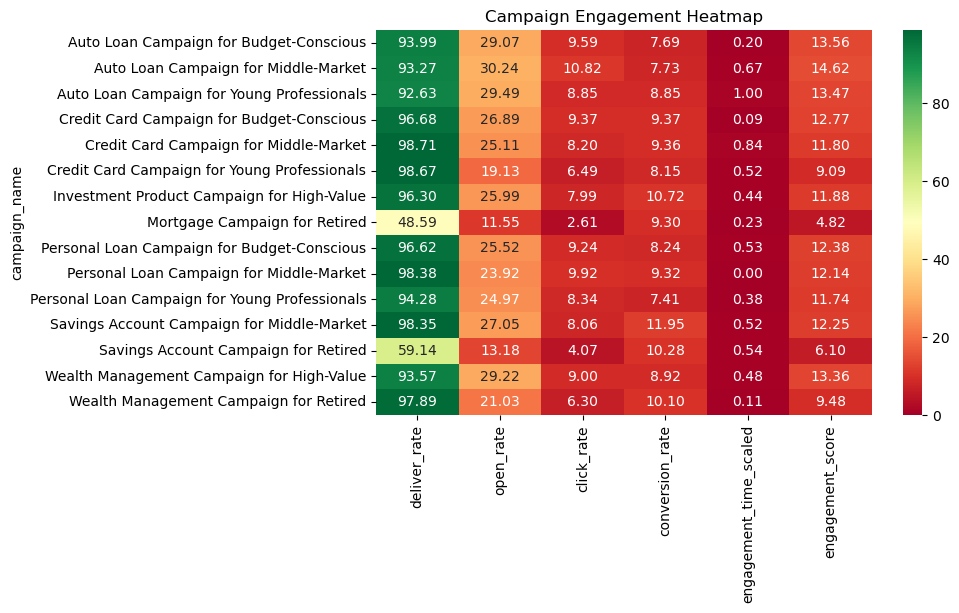

In [9]:
df_plt = df_m.drop("engagement_time_mean",axis=1)
plt.figure(figsize=(8, 5))
sns.heatmap(
    df_plt.set_index("campaign_name"),
    annot=True, cmap="RdYlGn", fmt=".2f"
)
plt.title("Campaign Engagement Heatmap")
plt.show()


In [22]:
profit_generated = (
  df_campaigns.groupby('campaign_name').agg(
    total_revenue = ('total_revenue_generated','sum'),
    total_campaign_cost=('total_campaign_cost','sum')
  )
  .assign(total_profit = lambda x:(x['total_revenue']-x['total_campaign_cost']))
  .reset_index()
  .sort_values(by="total_profit")
)

print(profit_generated)

                                     campaign_name  total_revenue  \
2       Auto Loan Campaign for Young Professionals       29154.99   
5     Credit Card Campaign for Young Professionals       86319.79   
3        Credit Card Campaign for Budget-Conscious      104820.46   
12            Savings Account Campaign for Retired      237154.71   
1             Auto Loan Campaign for Middle-Market      248382.54   
7                    Mortgage Campaign for Retired      392904.32   
9         Personal Loan Campaign for Middle-Market      280866.72   
0          Auto Loan Campaign for Budget-Conscious      285963.10   
10  Personal Loan Campaign for Young Professionals      302228.22   
6       Investment Product Campaign for High-Value      385408.90   
13       Wealth Management Campaign for High-Value      404706.95   
8      Personal Loan Campaign for Budget-Conscious      499335.86   
4           Credit Card Campaign for Middle-Market      462859.89   
11      Savings Account Campaign f

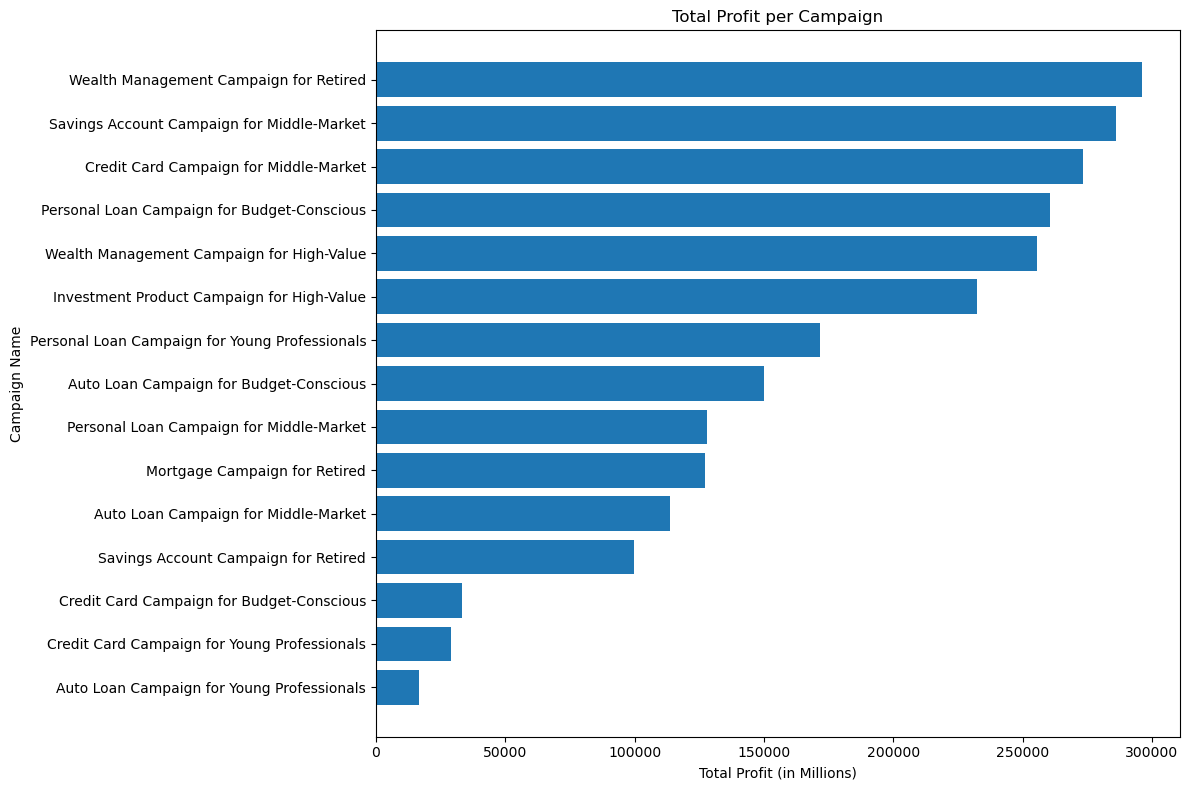

In [ ]:
campaigns = profit_generated['campaign_name']
total_profits = profit_generated['total_profit']

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(campaigns, total_profits)

# Labels & title
plt.xlabel('Total Profit')
plt.ylabel('Campaign Name')
plt.title('Total Profit per Campaign')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
df_m= df_m.merge(profit_generated,on="campaign_name")

In [41]:
#filtering values
df_converted = df[df["conversion_status"]==1].copy()
df_converted_churn = df_converted[df_converted["churn_prob"]>0].copy()

#expectedlifetime of customer = 1/churn probability
#clv = monthly revenue * expected lifetime of customer
df_converted_churn["monthly_revenue"] = df_converted_churn["total_transaction_amount_12m"]/12
df_converted_churn["expected_lifetime"] = 1/df_converted_churn['churn_prob']
df_converted_churn["clv"]= df_converted_churn["monthly_revenue"] * df_converted_churn["expected_lifetime"]
clv_per_camp = df_converted_churn.groupby(["campaign_name"])["clv"].mean().mul(1/1000).reset_index().sort_values(by="clv")

clv_per_camp

#merge clv into main df_m
df_m=df_m.merge(clv_per_camp,on="campaign_name")

MergeError: Passing 'suffixes' which cause duplicate columns {'clv_x'} is not allowed.

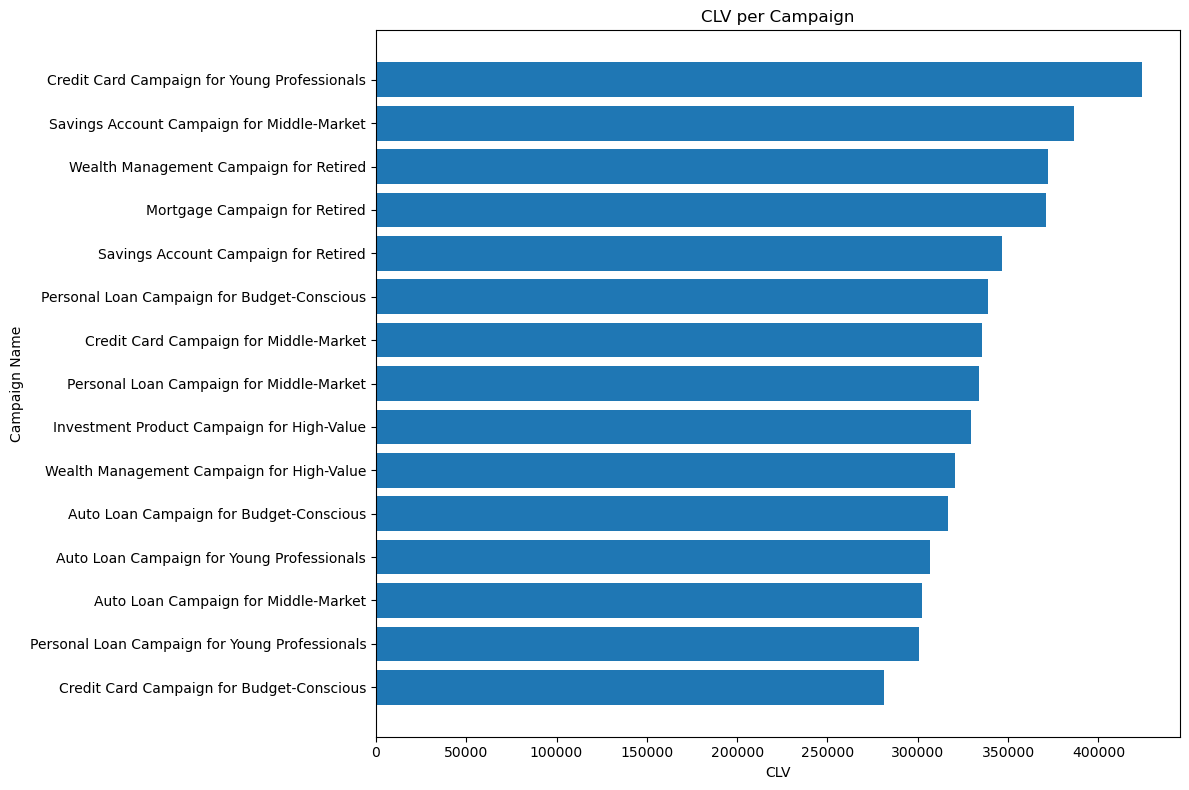

In [14]:
campaigns = clv_per_camp['campaign_name']
clv = clv_per_camp['clv']

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(campaigns, clv)

# Labels & title
plt.xlabel('CLV')
plt.ylabel('Campaign Name')
plt.title('CLV per Campaign')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

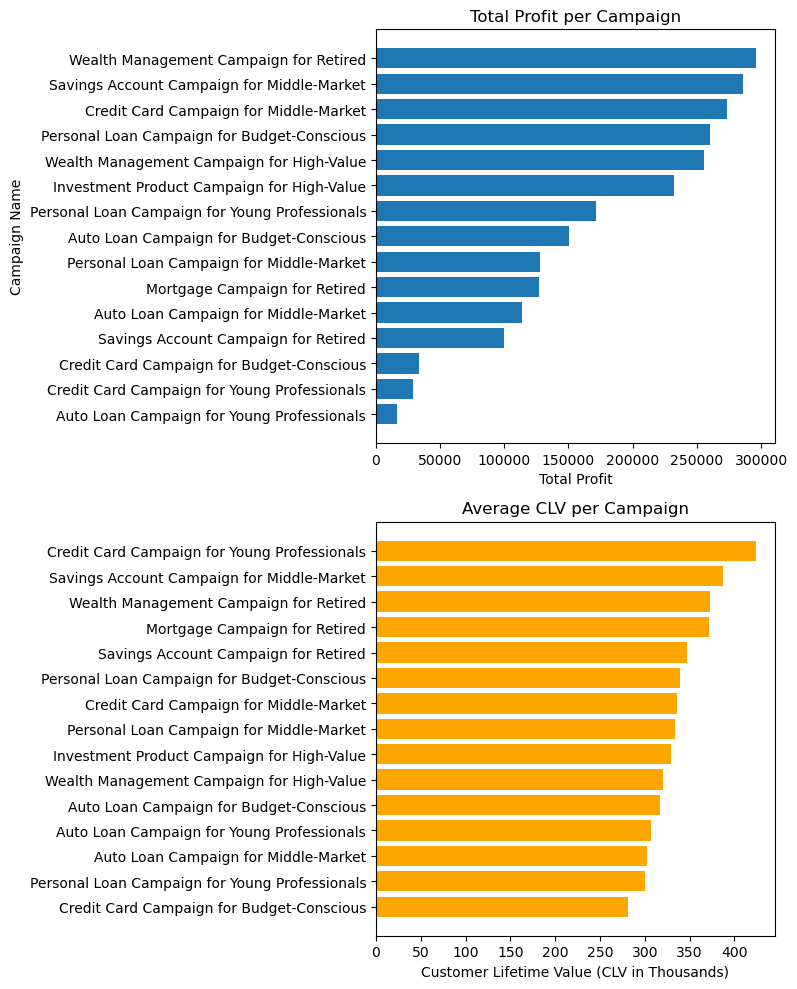

In [37]:
campaigns1 = profit_generated['campaign_name']
total_profits = profit_generated['total_profit']

campaigns2 = clv_per_camp['campaign_name']
clv = clv_per_camp['clv']

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(2, 1, figsize=(8, 10))  # Adjust figsize as needed

# Plot 1: Total Profit per Campaign
ax[0].barh(campaigns1, total_profits)
ax[0].set_xlabel('Total Profit')
ax[0].set_ylabel('Campaign Name')
ax[0].set_title('Total Profit per Campaign')

# Plot 2: CLV per Campaign
ax[1].barh(campaigns2, clv, color='orange')  # Optional: change color for contrast
ax[1].set_xlabel('Customer Lifetime Value (CLV in Thousands)')
ax[1].set_ylabel('')  # Skip to avoid duplication
ax[1].set_title('Average CLV per Campaign')

# Adjust layout
plt.tight_layout()

# Show both plots together
plt.show()

In [16]:
df_m[["engagement_score", "conversion_rate", "clv", "total_profit"]].corr()


,engagement_score,conversion_rate,clv,total_profit
engagement_score,1.000000,-0.270159,-0.578005,0.104862
conversion_rate,-0.270159,1.000000,0.352952,0.373096
clv,-0.578005,0.352952,1.000000,0.169031
total_profit,0.104862,0.373096,0.169031,1.000000


Text(0.5, 1.0, 'CLV vs Total Profit by Campaign')

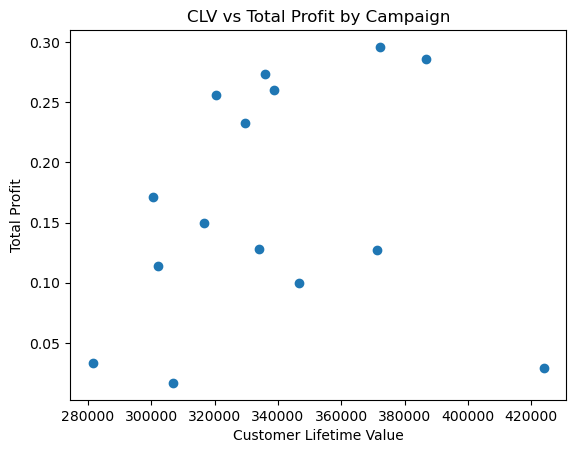

In [17]:


plt.scatter(df_m["clv"], df_m["total_profit"])
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Total Profit")
plt.title("CLV vs Total Profit by Campaign")


In [60]:
df_customers = pd.read_csv("../Data DSA3101/customers.csv")

In [70]:
df2 = df_customers.merge(df_engagement,on="customer_id")
binary_columns = ['sent','delivered','opened','clicked','conversion_status']
df2[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

df2["engagement_time"] = pd.to_timedelta(df2['engagement_time']).dt.total_seconds()
df2['engagement_time']

0        59849.0
1        55473.0
2        40838.0
3        40596.0
4        50115.0
          ...   
28916    37450.0
28917    59919.0
28918    46813.0
28919    53720.0
28920    44255.0
Name: engagement_time, Length: 28921, dtype: float64

In [ ]:
df2["engagement_time_scaled"] = (df2["engagement_time"] - df2["engagement_time"].min()) / (
    df2["engagement_time"].max() - df2["engagement_time"].min()
)

In [77]:
def func(var,df2):
  df_job = (df2.groupby(var).agg(
  deliver_rate = ('delivered','mean'),
      open_rate = ('opened','mean'),
      click_rate = ('clicked','mean'),
      conversion_rate = ('conversion_status', 'mean'),
      engagement_time_mean = ('engagement_time', 'mean'))
     .mul(100).reset_index()
)

  df_job["engagement_time_scaled"] = (df_job["engagement_time_mean"] - df_job["engagement_time_mean"].min()) / (
      df_job["engagement_time_mean"].max() - df_job["engagement_time_mean"].min()
  )

  df_job["engagement_score"] = (
      0.3 * df_job["open_rate"] +
      0.5 * df_job["click_rate"] +
      0.2 * df_job["engagement_time_scaled"]
  )
  df_job
  return df_job


In [78]:
func('job',df2)

,job,deliver_rate,open_rate,click_rate,conversion_rate,engagement_time_mean,engagement_time_scaled,engagement_score
0,admin,90.191948,24.157303,8.099251,9.363296,4.675710e+06,0.615880,11.419992
1,blue-collar,90.659341,23.832418,7.967033,8.602335,4.674576e+06,0.587441,11.250730
2,entrepreneur,90.690909,22.109091,8.727273,10.763636,4.691035e+06,1.000000,11.196364
3,management,90.606985,24.143778,7.799254,9.766022,4.680574e+06,0.737785,11.290317
4,retired,90.371494,23.351024,7.202426,8.567096,4.656133e+06,0.125162,10.631553
5,self-employed,90.312500,24.453125,8.671875,9.218750,4.664690e+06,0.339653,11.739806
6,services,91.175763,24.933878,7.573936,8.944458,4.684272e+06,0.830493,11.433230
7,student,91.080139,23.832753,7.595819,8.780488,4.651139e+06,0.000000,10.947735
8,technician,90.261228,23.831347,7.722273,9.234647,4.682402e+06,0.783625,11.167266
9,unemployed,89.485459,21.029083,8.202834,9.619687,4.675080e+06,0.600074,10.530156


In [73]:
df_job = (df2.groupby('job').agg(
  deliver_rate = ('delivered','mean'),
      open_rate = ('opened','mean'),
      click_rate = ('clicked','mean'),
      conversion_rate = ('conversion_status', 'mean'),
      engagement_time_mean = ('engagement_time', 'mean'))
     .mul(100).reset_index()
)

df_job["engagement_time_scaled"] = (df_job["engagement_time_mean"] - df_job["engagement_time_mean"].min()) / (
    df_job["engagement_time_mean"].max() - df_job["engagement_time_mean"].min()
)

df_job["engagement_score"] = (
    0.3 * df_job["open_rate"] +
    0.5 * df_job["click_rate"] +
    0.2 * df_job["engagement_time_scaled"]
)

df_job

,job,deliver_rate,open_rate,click_rate,conversion_rate,engagement_time_mean,engagement_time_scaled,engagement_score
0,admin,90.191948,24.157303,8.099251,9.363296,4.675710e+06,0.615880,11.419992
1,blue-collar,90.659341,23.832418,7.967033,8.602335,4.674576e+06,0.587441,11.250730
2,entrepreneur,90.690909,22.109091,8.727273,10.763636,4.691035e+06,1.000000,11.196364
3,management,90.606985,24.143778,7.799254,9.766022,4.680574e+06,0.737785,11.290317
4,retired,90.371494,23.351024,7.202426,8.567096,4.656133e+06,0.125162,10.631553
5,self-employed,90.312500,24.453125,8.671875,9.218750,4.664690e+06,0.339653,11.739806
6,services,91.175763,24.933878,7.573936,8.944458,4.684272e+06,0.830493,11.433230
7,student,91.080139,23.832753,7.595819,8.780488,4.651139e+06,0.000000,10.947735
8,technician,90.261228,23.831347,7.722273,9.234647,4.682402e+06,0.783625,11.167266
9,unemployed,89.485459,21.029083,8.202834,9.619687,4.675080e+06,0.600074,10.530156


In [79]:
func('age',df2)

,age,deliver_rate,open_rate,click_rate,conversion_rate,engagement_time_mean,engagement_time_scaled,engagement_score
0,10,66.666667,22.222222,0.000000,0.000000,4.255930e+06,0.086504,6.683967
1,11,100.000000,28.571429,0.000000,14.285714,5.319414e+06,0.836604,8.738749
2,12,60.000000,20.000000,0.000000,0.000000,4.463640e+06,0.233007,6.046601
3,13,87.500000,25.000000,0.000000,12.500000,4.834112e+06,0.494310,7.598862
4,14,78.571429,14.285714,0.000000,14.285714,4.626621e+06,0.347961,4.355307
...,...,...,...,...,...,...,...,...
85,95,85.185185,40.740741,3.703704,3.703704,4.716436e+06,0.411309,14.156336
86,96,100.000000,25.000000,25.000000,25.000000,4.793025e+06,0.465330,20.093066
87,97,87.500000,12.500000,0.000000,37.500000,4.509188e+06,0.265132,3.803026
88,98,81.250000,12.500000,18.750000,6.250000,4.894844e+06,0.537145,13.232429
